In [2]:
# change working directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej/prace/ferda/ferda_github


In [3]:
import os
import pandas as pd

In [5]:


# evaluations = {
#     '180427_vaib': 'experiments/tracking/5Zebrafish_nocover_22min/180427_vaib/evaluation.csv',
#     '180626': '../projects/regression/zebrafish_new/evaluation.csv',
#     'idtracker_nogaps': 'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/evaluation_trajectories_nogaps.csv',
#     'idtracker': 'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/evaluation_trajectories.csv',
#     'toxtrac': 'experiments/tracking/5Zebrafish_nocover_22min/__toxtrac/evaluation.csv',
# }

# dataset_name = '5Zebrafish_nocover_22min'

evaluations = {
    '180427_vaib': 'experiments/tracking/Cam1_clip/180427_vaib/evaluation.csv',
    '180704': '/home/matej/prace/ferda/projects/regression/cam1_clip_new/evaluation.csv',
    'toxtrac': 'experiments/tracking/Cam1_clip/__toxtrac/evaluation.csv',
    'toxtrac_tight_segmentation': 'experiments/tracking/Cam1_clip/__toxtrac_better_thresh/evaluation.csv',
    'idtracker': 'experiments/tracking/Cam1_clip/__idtracker/evaluation.csv',
    'idtracker_nogaps': 'experiments/tracking/Cam1_clip/__idtracker/evaluation_nogaps.csv',    
}
   
dataset_name = 'Cam1_clip'

# evaluations = {
# #    '180427_vaib': 'experiments/tracking/Sowbug3_cut/180427_vaib/evaluation.csv',
#     '180626': '../projects/regression/Sowbug3_cut_min1_new/evaluation.csv',
#      'idtracker_nogaps': 'experiments/tracking/Sowbug3_cut/__idtracker/evaluation_nogaps.csv',
#      'idtracker': 'experiments/tracking/Sowbug3_cut/__idtracker/evaluation.csv',
#      'toxtrac': 'experiments/tracking/Sowbug3_cut/__toxtrac/evaluation.csv',
# }

# dataset_name = 'Sowbug3_cut'

# evaluations = {
#      '180427_vaib': 'experiments/tracking/Camera3-5min/180427_vaib/evaluation.csv',
#      'idtracker_nogaps': 'experiments/tracking/Camera3-5min/__idtracker/evaluation_nogaps.csv',
#      'idtracker': 'experiments/tracking/Camera3-5min/__idtracker/evaluation.csv',
#      'toxtrac': 'experiments/tracking/Camera3-5min/__toxtrac/evaluation.csv',
# }

# dataset_name = 'Camera3-5min'



In [6]:
all_evals = []
for name, path in evaluations.items():
    df = pd.read_csv(path)
    df.insert(0, 'experiment', name)
    all_evals.append(df)
df = pd.concat(all_evals).set_index('experiment')
df

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
180704,0.637370,0.637370,0.637370,0.719222,0.719222,6,2,4,0,7581,7581,49,387,0.436630,138.438813
180427_vaib,0.699556,0.699556,0.699556,0.700148,0.700148,6,2,4,0,8096,8096,6,288,0.400074,1.974294
toxtrac,0.097106,0.161196,0.069481,0.431037,1.000000,6,0,6,0,0,15362,167,166,0.424852,133.370349
idtracker_nogaps,0.899656,0.899756,0.899556,0.899815,0.900015,6,6,0,0,2699,2705,2,35,0.799778,133.556985
idtracker,0.605956,0.606024,0.605889,0.608370,0.608506,6,1,5,0,10568,10574,18,259,0.216296,63.196044
toxtrac_tight_segmentation,0.652834,0.953204,0.496407,0.520778,1.000000,6,0,6,0,0,12939,13,122,0.520296,195.002656


In [7]:
df.to_csv('{}_comparison.csv'.format(dataset_name))

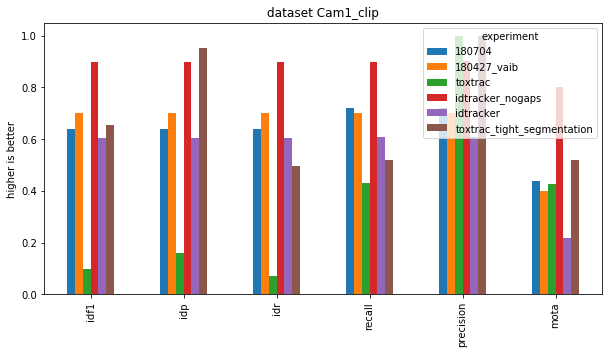

In [8]:
ax = df[['idf1', 'idp', 'idr', 'recall', 'precision','mota']].T.plot.bar(figsize=(10, 5), title='dataset ' + dataset_name)
_ = ax.set_ylabel('higher is better')

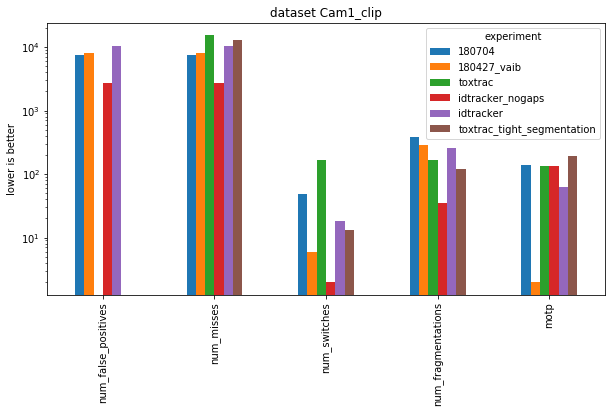

In [9]:
ax = df[['num_false_positives', 'num_misses', 'num_switches','num_fragmentations', 'motp']].T.plot.bar(figsize=(10, 5), logy=True, title='dataset ' + dataset_name)
_ = ax.set_ylabel('lower is better')